In [171]:
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
df = pd.read_fwf('solar_irradiation.txt')
# source = http://www2.mps.mpg.de/projects/sun-climate/data.html

df_range = df.loc[23:]
sel = df_range[';SATIRE-S DAILY RECONSTRUCTION OF TOTAL SOLAR IRRADIANCE SINCE 1974'].to_frame()
sel['day_temperature'] = sel[';SATIRE-S DAILY RECONSTRUCTION OF TOTAL SOLAR IRRADIANCE SINCE 1974'] 
dataframe = sel['day_temperature'].to_frame()
dataframe.head(3)

,day_temperature
23,2442283 1361.0813 1360.8449 ...
24,2442284 1361.2541 1361.0125 ...
25,2442285 1361.0907 1360.8717 ...


In [173]:
dataframe['julian_day'] = dataframe['day_temperature'].str[:7]
dataframe['temperature'] = dataframe['day_temperature'].str[15:25]

df = dataframe.reset_index()

selection = df[['julian_day', 'temperature']]
selection

,julian_day,temperature
0,2442283,1361.0813
1,2442284,1361.2541
2,2442285,1361.0907
3,2442286,1361.1308
4,2442287,1361.1251
...,...,...
17847,2460130,1361.7703
17848,2460131,1361.6242
17849,2460132,1361.5075
17850,2460133,1361.2588


In [174]:
selection.to_csv('cleanirradation.csv', index = False)

In [175]:
selection

,julian_day,temperature
0,2442283,1361.0813
1,2442284,1361.2541
2,2442285,1361.0907
3,2442286,1361.1308
4,2442287,1361.1251
...,...,...
17847,2460130,1361.7703
17848,2460131,1361.6242
17849,2460132,1361.5075
17850,2460133,1361.2588


In [176]:
df = pd.read_csv('irradiation.csv')
df.head(3)

,julian_day,temperature,date
0,2442283,1361.0813,1974-08-23 12:00:00
1,2442284,1361.2541,1974-08-24 12:00:00
2,2442285,1361.0907,1974-08-25 12:00:00


In [177]:
sel = df[['temperature', 'date']]
sel.dtypes

temperature    float64
date            object
dtype: object

In [178]:
import datetime

In [179]:
sel['date'] = pd.to_datetime(sel['date'])

<ipython-input-179-43afeaa5faf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel['date'] = pd.to_datetime(sel['date'])


In [180]:
sel.dtypes

temperature           float64
date           datetime64[ns]
dtype: object

In [181]:
sel['year'] = sel['date'].dt.year
df = sel[['temperature', 'year']]
df1 = df.groupby(df['year']).mean()
irr = df1.reset_index()
irr.rename(columns = {'temperature': 'irradation'}, inplace = True)
irr

,year,irradation
0,1974,1361.096847
1,1975,1360.992287
2,1976,1360.943242
3,1977,1361.218961
4,1978,1361.616641
5,1979,1361.838188
6,1980,1361.680920
7,1981,1361.677298
8,1982,1361.450994
9,1983,1361.439662


In [182]:
temp = pd.read_csv('clean_data_copy.csv')

In [183]:
df1 = temp.groupby('year').mean()
df2 = df1.stack()

In [184]:
df3 = df2.to_frame().reset_index()
mean = df3.groupby(df3['year']).mean()
mean_avg = mean.reset_index()
mean_avg.rename(columns = {0: 'temperature'}, inplace = True)
mean_avg


,year,temperature
0,1961,12.389595
1,1962,12.216120
2,1963,12.630255
3,1964,12.043963
4,1965,12.149024
5,1966,12.405784
6,1967,12.299859
7,1968,12.188847
8,1969,12.223829
9,1970,12.429094


In [185]:
irr.head(1), irr.tail(1), mean_avg.head(1), mean_avg.tail(1)

(   year   irradation
 0  1974  1361.096847,
     year   irradation
 49  2023  1361.501401,
    year  temperature
 0  1961    12.389595,
     year  temperature
 49  2010    12.791757)

In [186]:
sel = irr['year'] <= 2010
irr_clean = irr[sel]

sel1 = mean_avg['year'] >= 1974
temp_clean = mean_avg[sel1]

In [187]:
irr_clean.head(1), irr_clean.tail(1), temp_clean.head(1), temp_clean.tail(1)

(   year   irradation
 0  1974  1361.096847,
     year   irradation
 36  2010  1360.719355,
     year  temperature
 13  1974    12.307509,
     year  temperature
 49  2010    12.791757)

In [192]:
import numpy as np
import scipy.stats as stats

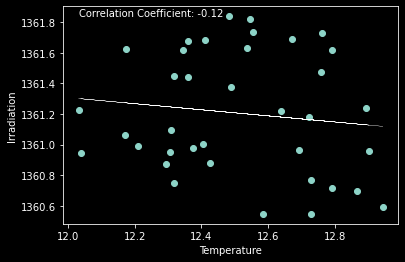

In [239]:
x = temp_clean['temperature']
y = irr_clean['irradation']

plt.style.use('dark_background')


plt.scatter(x = x, y = y)


# Calculate correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]

# Plot regression line
slope, intercept, _, _, _ = stats.linregress(x, y)
reg_line = f'Regression Line: y = {slope:.2f}x + {intercept:.2f}'
plt.plot(x, slope * x + intercept, color='white', label=reg_line, linewidth = 0.2, linestyle = '-')

corr_text = f'Correlation Coefficient: {corr_coef:.2f}'
plt.annotate(corr_text, (np.min(x), np.max(y)), fontsize=10)


plt.xlabel('Temperature')
plt.ylabel('Irradiation')


plt.show()